In [1]:
import sys
sys.path.append('..')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import utility functions from src.utils
from src.utils import (
    load_trajectory_file,
    extract_flight_metadata,
    extract_trajectory_data,
    get_all_flight_files,
    create_metadata_dataframe,
    plot_individual_trajectory,
    plot_summary_statistics,
    print_dataset_summary
)

In [5]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [8]:
# Data directory containing JSON files
DATA_DIR = "../sandbox/SCAT_unzipped"  # Change this to your data directory path

# Example flight ID to explore (you can change this)
EXAMPLE_FLIGHT_ID = "100000"

# Plotting settings
FIGURE_SIZE = (15, 10)
DPI = 100

In [9]:
# =============================================================================
# DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

data_path = Path(DATA_DIR)
if not data_path.exists():
    print(f"Warning: Data directory {DATA_DIR} does not exist!")
    print("Please update the DATA_DIR constant above.")
else:
    print(f"Data directory found: {data_path.absolute()}")
    
    # Get all flight files
    flight_files = get_all_flight_files(DATA_DIR)
    print(f"Found {len(flight_files)} flight files")
    
    if len(flight_files) > 0:
        print(f"\nFirst 5 files:")
        for file in flight_files[:5]:
            print(f"  {Path(file).name}")

Data directory found: /home/sharonpe/ImpostAir/notebooks/../sandbox/SCAT_unzipped
Found 13138 flight files

First 5 files:
  105194.json
  101240.json
  105605.json
  103165.json
  105562.json


In [10]:
# =============================================================================
# DATASET METADATA ANALYSIS
# =============================================================================

# Create metadata DataFrame from all files
print("Loading metadata from all flight files...")
metadata_df = create_metadata_dataframe(DATA_DIR)

print(f"\nMetadata DataFrame shape: {metadata_df.shape}")
print(f"Columns: {list(metadata_df.columns)}")

# Display first few rows
print("\nFirst few rows of metadata:")
print(metadata_df.head())

# Print comprehensive dataset summary
print_dataset_summary(metadata_df)

Loading metadata from all flight files...

Metadata DataFrame shape: (13138, 11)
Columns: ['file_id', 'departure_airport', 'destination_airport', 'aircraft_type', 'callsign', 'flight_rules', 'num_plots', 'flight_duration_minutes', 'start_time', 'end_time', 'file_path']

First few rows of metadata:
   file_id departure_airport destination_airport aircraft_type callsign  \
0   105194              ENCN                EPGD          A320   WZZ1UU   
1   101240              ESSA                EGLL          B763  BAW781C   
2   105605              ESTA                ESSA          B736   SAS186   
3   103165              ESSA                ESGG          B737   SAS151   
4   105562              LTBA                KLAX          B77W   THY75C   

  flight_rules  num_plots  flight_duration_minutes  \
0            I        337                27.983333   
1            I        469                39.005078   
2            I        627                52.164974   
3            I        502         

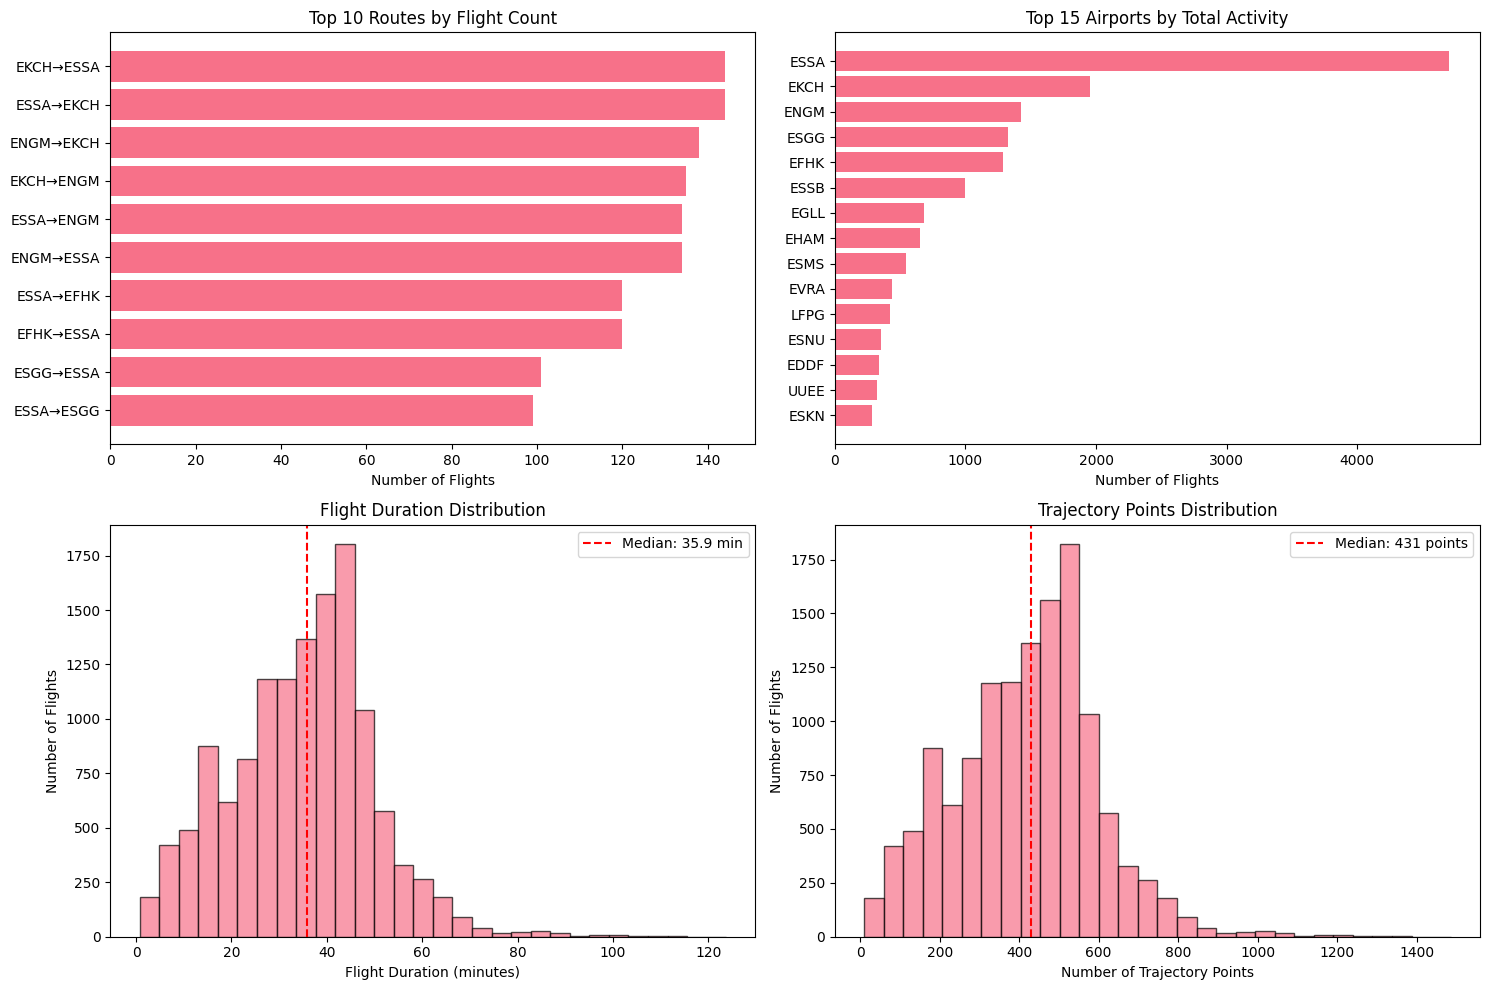

In [11]:
# =============================================================================
# SUMMARY STATISTICS VISUALIZATION
# =============================================================================

# Plot summary statistics
plot_summary_statistics(metadata_df)


Flight Analysis for ID: 100000
Callsign: NAX3580
Route: EKCH → LKPR
Aircraft: B738
Duration: 4.2 minutes
Trajectory points: 52
Trajectory DataFrame shape: (52, 8)


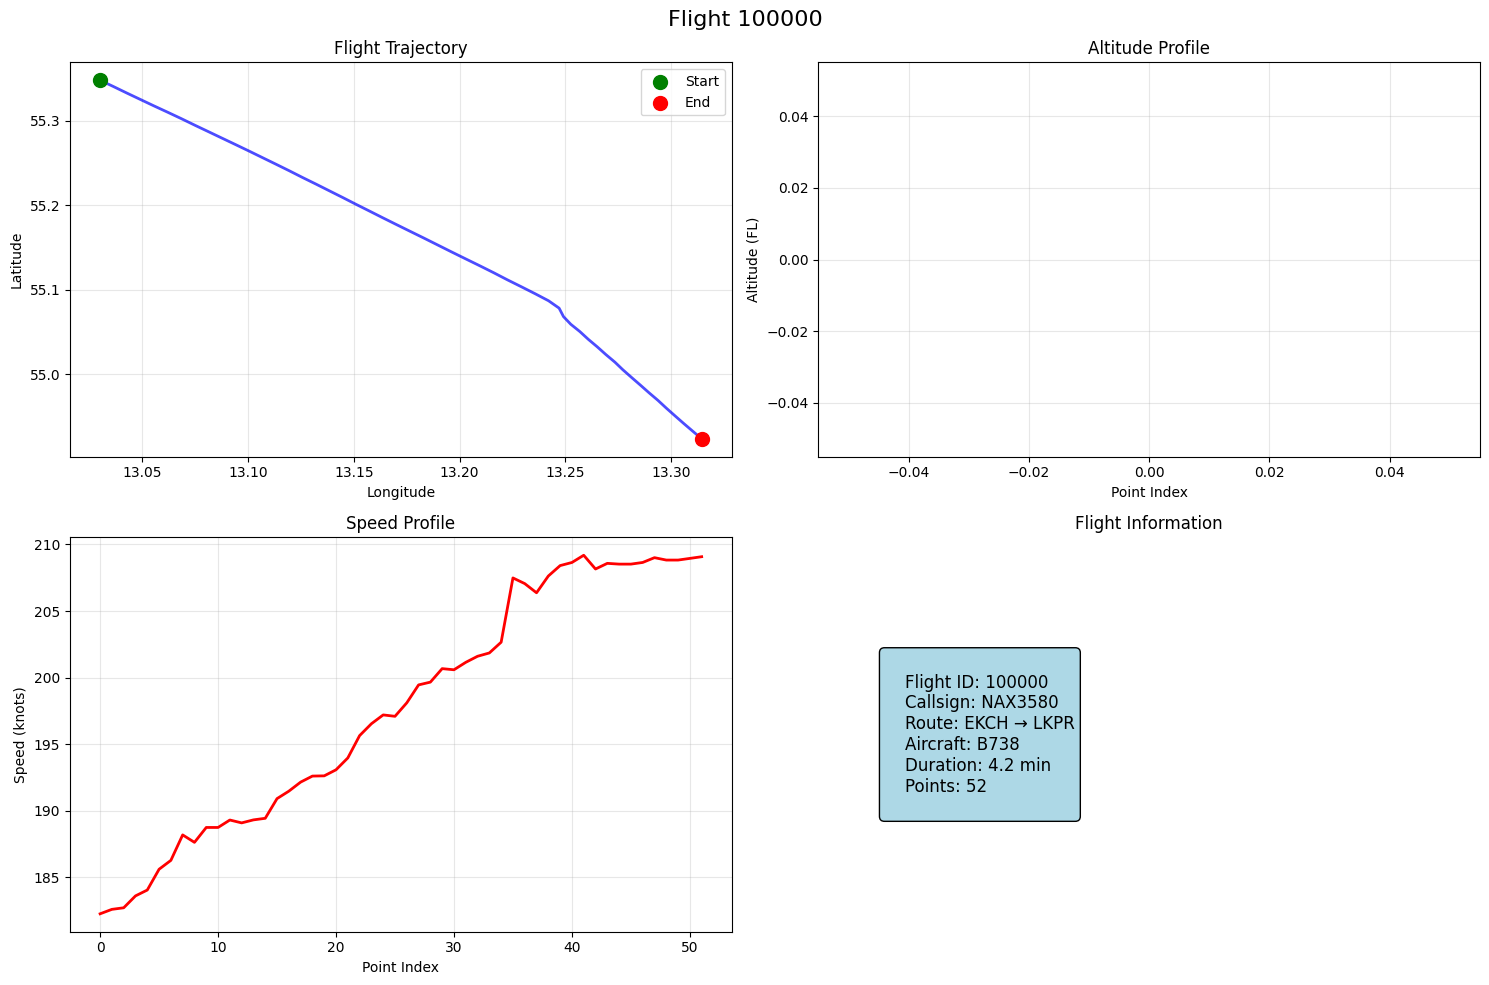

In [12]:
# =============================================================================
# INDIVIDUAL FLIGHT ANALYSIS
# =============================================================================

# Function to explore a specific flight
def explore_flight(flight_id, data_dir):
    """Load and analyze a specific flight by ID."""
    file_path = Path(data_dir) / f"{flight_id}.json"
    
    if not file_path.exists():
        print(f"Flight file {file_path} not found!")
        return None, None, None
    
    # Load flight data
    flight_data = load_trajectory_file(str(file_path))
    
    # Extract metadata
    metadata = extract_flight_metadata(flight_data)
    
    # Extract trajectory data
    trajectory_df = extract_trajectory_data(flight_data)
    
    print(f"\nFlight Analysis for ID: {flight_id}")
    print("=" * 50)
    print(f"Callsign: {metadata['callsign']}")
    print(f"Route: {metadata['departure_airport']} → {metadata['destination_airport']}")
    print(f"Aircraft: {metadata['aircraft_type']}")
    print(f"Duration: {metadata['flight_duration_minutes']:.1f} minutes")
    print(f"Trajectory points: {metadata['num_plots']}")
    print(f"Trajectory DataFrame shape: {trajectory_df.shape}")
    
    return flight_data, metadata, trajectory_df

# Explore the example flight
flight_data, metadata, trajectory_df = explore_flight(EXAMPLE_FLIGHT_ID, DATA_DIR)

# Plot the individual flight trajectory
if flight_data is not None:
    plot_individual_trajectory(flight_data, f"Flight {EXAMPLE_FLIGHT_ID}")

Available flight IDs (first 10): ['105194', '101240', '105605', '103165', '105562', '108379', '104497', '111595', '108399', '111744']

Flight Analysis for ID: 100000
Callsign: NAX3580
Route: EKCH → LKPR
Aircraft: B738
Duration: 4.2 minutes
Trajectory points: 52
Trajectory DataFrame shape: (52, 8)


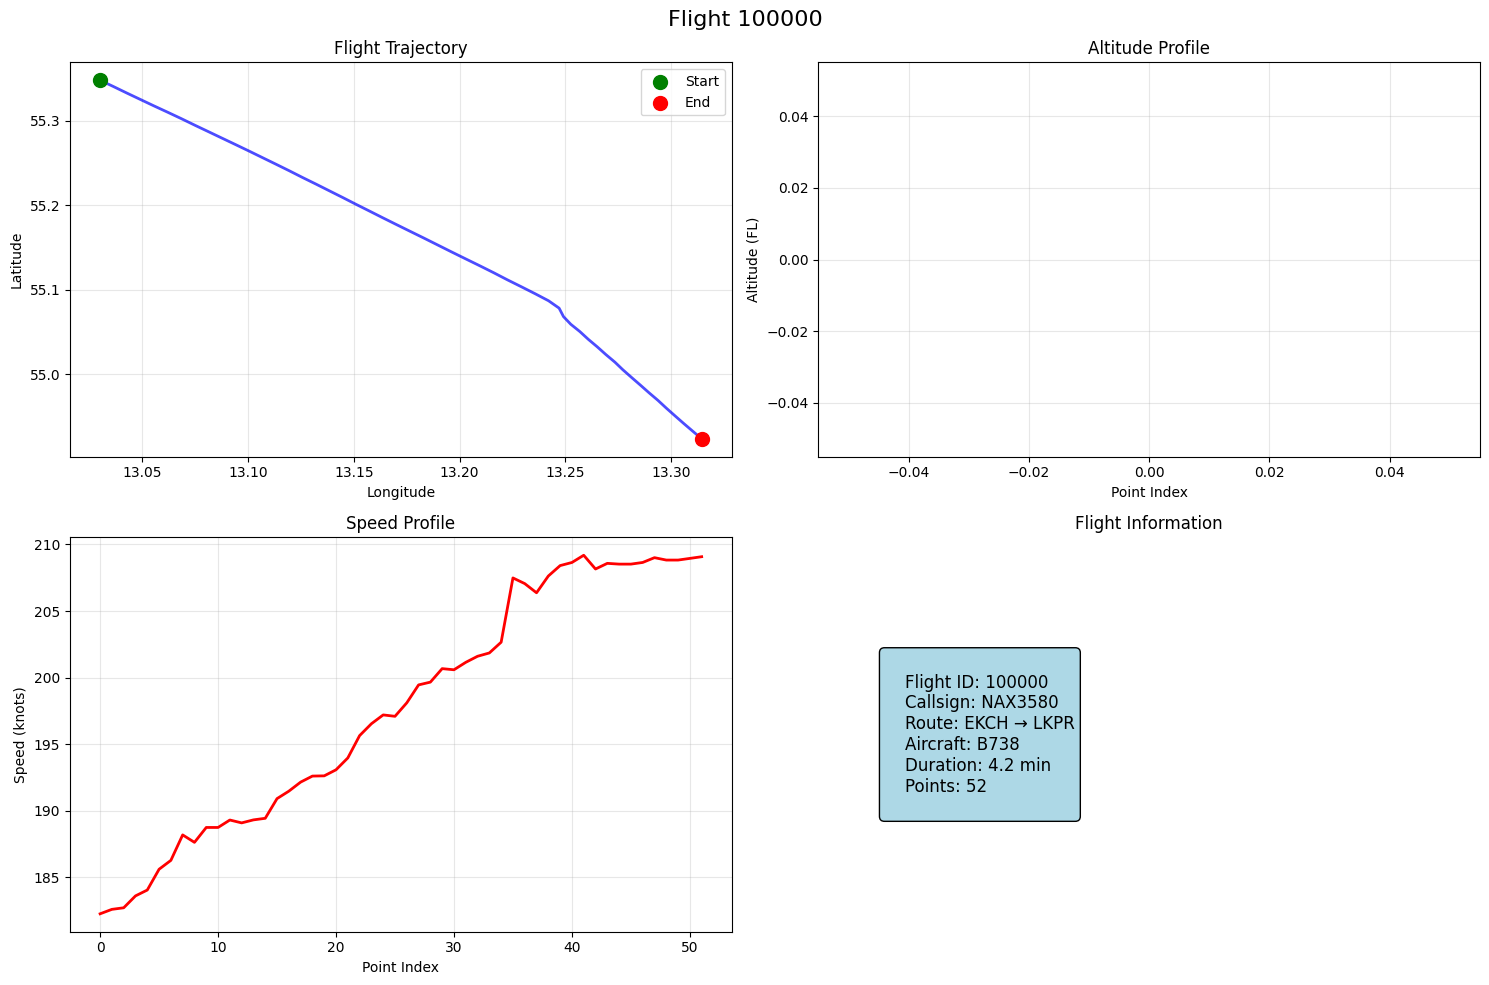

In [13]:
# =============================================================================
# INTERACTIVE FLIGHT EXPLORATION
# =============================================================================

# Change this to explore a different flight
flight_id_to_explore = "100000"  # Change this to any flight ID you want to explore

# Get available flight IDs
available_flights = [Path(f).stem for f in get_all_flight_files(DATA_DIR)]
print(f"Available flight IDs (first 10): {available_flights[:10]}")

# Explore the selected flight
if flight_id_to_explore in available_flights:
    flight_data, metadata, trajectory_df = explore_flight(flight_id_to_explore, DATA_DIR)
    plot_individual_trajectory(flight_data, f"Flight {flight_id_to_explore}")
else:
    print(f"Flight ID {flight_id_to_explore} not found in available flights.")
    print(f"Please choose from: {available_flights[:20]}...")

Route Analysis
Total unique routes: 1498
Routes with multiple flights: 1219
Routes with single flight: 279

Top 10 most frequent routes:
  EKCH → ESSA: 144 flights
  ESSA → EKCH: 144 flights
  ENGM → EKCH: 138 flights
  EKCH → ENGM: 135 flights
  ESSA → ENGM: 134 flights
  ENGM → ESSA: 134 flights
  ESSA → EFHK: 120 flights
  EFHK → ESSA: 120 flights
  ESGG → ESSA: 101 flights
  ESSA → ESGG: 99 flights

Route Concentration:
Top 10 routes account for 9.7% of all flights
This suggests low route concentration


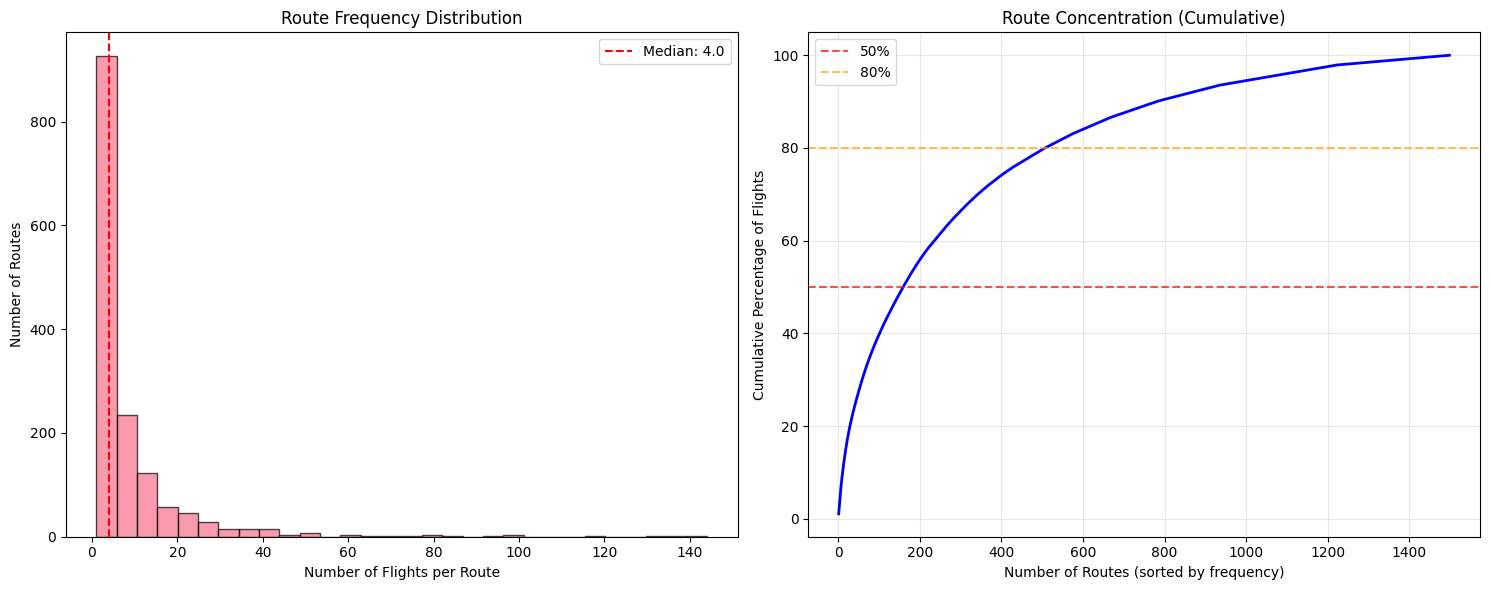

In [14]:
# =============================================================================
# ROUTE ANALYSIS
# =============================================================================

# Analyze route patterns
print("Route Analysis")
print("=" * 30)

# Route frequency
route_counts = metadata_df.groupby(['departure_airport', 'destination_airport']).size().reset_index(name='count')
route_counts = route_counts.sort_values('count', ascending=False)

print(f"Total unique routes: {len(route_counts)}")
print(f"Routes with multiple flights: {(route_counts['count'] > 1).sum()}")
print(f"Routes with single flight: {(route_counts['count'] == 1).sum()}")

print("\nTop 10 most frequent routes:")
for _, row in route_counts.head(10).iterrows():
    print(f"  {row['departure_airport']} → {row['destination_airport']}: {row['count']} flights")

# Route concentration analysis
total_flights = len(metadata_df)
top_10_routes_flights = route_counts.head(10)['count'].sum()
concentration_percentage = (top_10_routes_flights / total_flights) * 100

print(f"\nRoute Concentration:")
print(f"Top 10 routes account for {concentration_percentage:.1f}% of all flights")
print(f"This suggests {'high' if concentration_percentage > 50 else 'moderate' if concentration_percentage > 20 else 'low'} route concentration")

# Visualize route concentration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Route frequency distribution
ax1.hist(route_counts['count'], bins=30, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Number of Flights per Route')
ax1.set_ylabel('Number of Routes')
ax1.set_title('Route Frequency Distribution')
ax1.axvline(route_counts['count'].median(), color='red', linestyle='--', 
           label=f'Median: {route_counts["count"].median():.1f}')
ax1.legend()

# Plot 2: Cumulative distribution
sorted_counts = route_counts['count'].sort_values(ascending=False)
cumulative_percentage = (sorted_counts.cumsum() / total_flights) * 100
ax2.plot(range(1, len(sorted_counts) + 1), cumulative_percentage, 'b-', linewidth=2)
ax2.set_xlabel('Number of Routes (sorted by frequency)')
ax2.set_ylabel('Cumulative Percentage of Flights')
ax2.set_title('Route Concentration (Cumulative)')
ax2.grid(True, alpha=0.3)

# Add reference lines
ax2.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50%')
ax2.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80%')
ax2.legend()

plt.tight_layout()
plt.show()

Aircraft Type Analysis
Total unique aircraft types: 60

Top 10 aircraft types:
  B738: 2944 flights (22.4%)
  A320: 1689 flights (12.9%)
  B736: 638 flights (4.9%)
  CRJ9: 623 flights (4.7%)
  B737: 611 flights (4.7%)
  AT76: 576 flights (4.4%)
  B77W: 542 flights (4.1%)
  A321: 520 flights (4.0%)
  A319: 483 flights (3.7%)
  E190: 395 flights (3.0%)


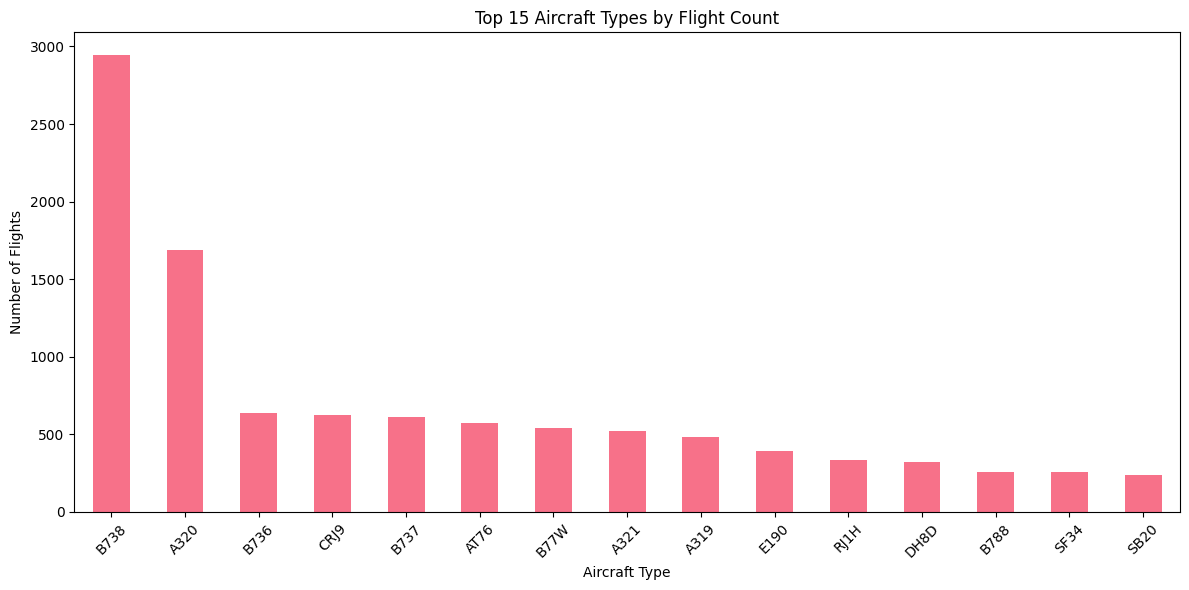

In [15]:
# =============================================================================
# AIRCRAFT TYPE ANALYSIS
# =============================================================================

# Analyze aircraft types
aircraft_counts = metadata_df['aircraft_type'].value_counts()

print("Aircraft Type Analysis")
print("=" * 30)
print(f"Total unique aircraft types: {len(aircraft_counts)}")
print(f"\nTop 10 aircraft types:")
for aircraft, count in aircraft_counts.head(10).items():
    percentage = (count / len(metadata_df)) * 100
    print(f"  {aircraft}: {count} flights ({percentage:.1f}%)")

# Visualize aircraft distribution
plt.figure(figsize=(12, 6))
aircraft_counts.head(15).plot(kind='bar')
plt.title('Top 15 Aircraft Types by Flight Count')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# =============================================================================
# DATA QUALITY ASSESSMENT
# =============================================================================

# Assess data quality
print("Data Quality Assessment")
print("=" * 30)

# Missing values
missing_data = metadata_df.isnull().sum()
print("Missing values per column:")
for col, missing in missing_data.items():
    if missing > 0:
        percentage = (missing / len(metadata_df)) * 100
        print(f"  {col}: {missing} ({percentage:.1f}%)")

# Data completeness
print(f"\nData completeness:")
print(f"  Flights with complete metadata: {(~metadata_df.isnull().any(axis=1)).sum()} ({(~metadata_df.isnull().any(axis=1)).mean()*100:.1f}%)")
print(f"  Flights with trajectory data: {(metadata_df['num_plots'] > 0).sum()} ({(metadata_df['num_plots'] > 0).mean()*100:.1f}%)")
print(f"  Flights with duration data: {metadata_df['flight_duration_minutes'].notna().sum()} ({metadata_df['flight_duration_minutes'].notna().mean()*100:.1f}%)")

# Outlier detection for duration
if 'flight_duration_minutes' in metadata_df.columns:
    valid_durations = metadata_df['flight_duration_minutes'].dropna()
    Q1 = valid_durations.quantile(0.25)
    Q3 = valid_durations.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = valid_durations[(valid_durations < lower_bound) | (valid_durations > upper_bound)]
    print(f"\nDuration outliers (IQR method): {len(outliers)} ({len(outliers)/len(valid_durations)*100:.1f}%)")
    print(f"  Outlier range: {outliers.min():.1f} - {outliers.max():.1f} minutes")

Data Quality Assessment
Missing values per column:

Data completeness:
  Flights with complete metadata: 13138 (100.0%)
  Flights with trajectory data: 13138 (100.0%)
  Flights with duration data: 13138 (100.0%)

Duration outliers (IQR method): 122 (0.9%)
  Outlier range: 73.2 - 123.7 minutes


In [17]:
# =============================================================================
# SUMMARY AND INSIGHTS
# =============================================================================

print("EDA Summary and Insights")
print("=" * 40)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total flights analyzed: {len(metadata_df)}")
print(f"   - Geographic coverage: {metadata_df['departure_airport'].nunique()} departure airports, {metadata_df['destination_airport'].nunique()} destination airports")
print(f"   - Route diversity: {metadata_df.groupby(['departure_airport', 'destination_airport']).ngroups} unique routes")

print("\n2. ROUTE PATTERNS:")
if concentration_percentage > 50:
    print(f"   - HIGH route concentration: Top 10 routes account for {concentration_percentage:.1f}% of flights")
    print("   - This suggests the dataset focuses on major routes or specific regions")
elif concentration_percentage > 20:
    print(f"   - MODERATE route concentration: Top 10 routes account for {concentration_percentage:.1f}% of flights")
    print("   - This suggests a mix of major and minor routes")
else:
    print(f"   - LOW route concentration: Top 10 routes account for {concentration_percentage:.1f}% of flights")
    print("   - This suggests high route diversity")

print("\n3. FLIGHT CHARACTERISTICS:")
if 'flight_duration_minutes' in metadata_df.columns:
    valid_durations = metadata_df['flight_duration_minutes'].dropna()
    print(f"   - Flight duration: {valid_durations.mean():.1f} ± {valid_durations.std():.1f} minutes (mean ± std)")
    print(f"   - Duration range: {valid_durations.min():.1f} - {valid_durations.max():.1f} minutes")

print(f"   - Trajectory points: {metadata_df['num_plots'].mean():.1f} ± {metadata_df['num_plots'].std():.1f} points per flight")

print("\n4. RECOMMENDATIONS FOR MODELING:")
print("   - Consider route-specific models if concentration is high")
print("   - Use data augmentation if route diversity is low")
print("   - Implement robust preprocessing for missing trajectory data")
print("   - Consider temporal patterns in flight scheduling")

print("\n5. NEXT STEPS:")
print("   - Analyze temporal patterns (time of day, day of week)")
print("   - Investigate weather impact on trajectories")
print("   - Explore altitude and speed patterns")
print("   - Build trajectory prediction models")

print("\nEDA Analysis Complete!") 

EDA Summary and Insights

1. DATASET OVERVIEW:
   - Total flights analyzed: 13138
   - Geographic coverage: 255 departure airports, 268 destination airports
   - Route diversity: 1498 unique routes

2. ROUTE PATTERNS:
   - LOW route concentration: Top 10 routes account for 9.7% of flights
   - This suggests high route diversity

3. FLIGHT CHARACTERISTICS:
   - Flight duration: 34.8 ± 14.9 minutes (mean ± std)
   - Duration range: 0.8 - 123.7 minutes
   - Trajectory points: 418.6 ± 179.3 points per flight

4. RECOMMENDATIONS FOR MODELING:
   - Consider route-specific models if concentration is high
   - Use data augmentation if route diversity is low
   - Implement robust preprocessing for missing trajectory data
   - Consider temporal patterns in flight scheduling

5. NEXT STEPS:
   - Analyze temporal patterns (time of day, day of week)
   - Investigate weather impact on trajectories
   - Explore altitude and speed patterns
   - Build trajectory prediction models

EDA Analysis Complete